In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles.csv


In [3]:
df = pd.read_csv('netflix_titles.csv')

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
# Convert 'date_added' to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


In [7]:
# Extract the year from the date_added column
df['year_added'] = df['date_added'].dt.year


In [8]:
# Check for missing values and fill or drop as necessary
print(df.isnull().sum())


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        98
release_year       0
rating             4
duration           3
listed_in          0
description        0
year_added        98
dtype: int64


In [9]:

# Drop rows with missing ratings if needed
df = df.dropna(subset=['rating'])


In [10]:
#visualise the number of releases over the years by genre
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df['genre'] = df['listed_in'].str.split(', ').str[0]  # Get the first genre

<ipython-input-20-401ee723ad88>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', palette='Set1')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like,

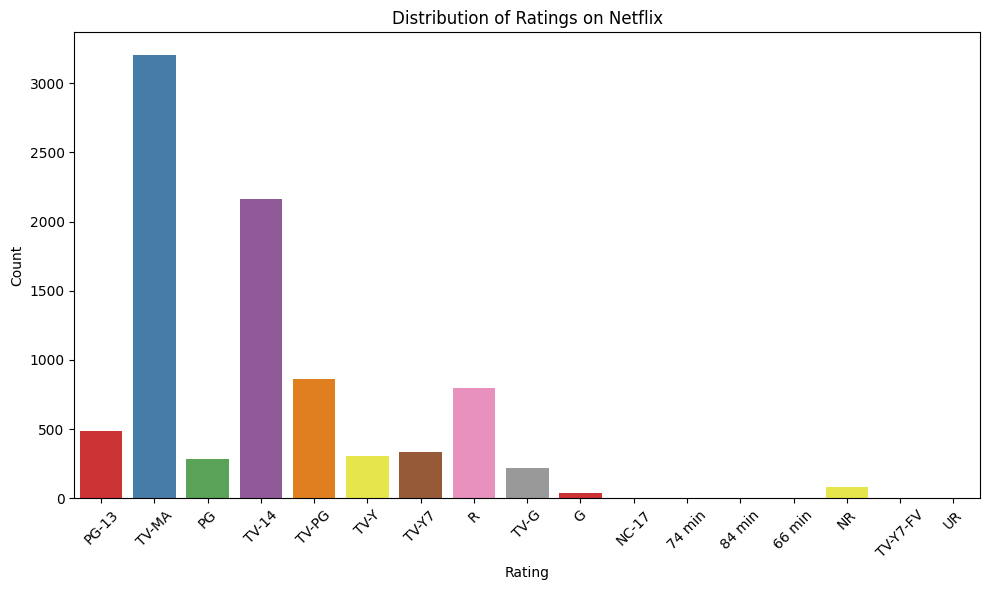

In [20]:
# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rating', palette='Set1')

plt.title('Distribution of Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1400x700 with 0 Axes>

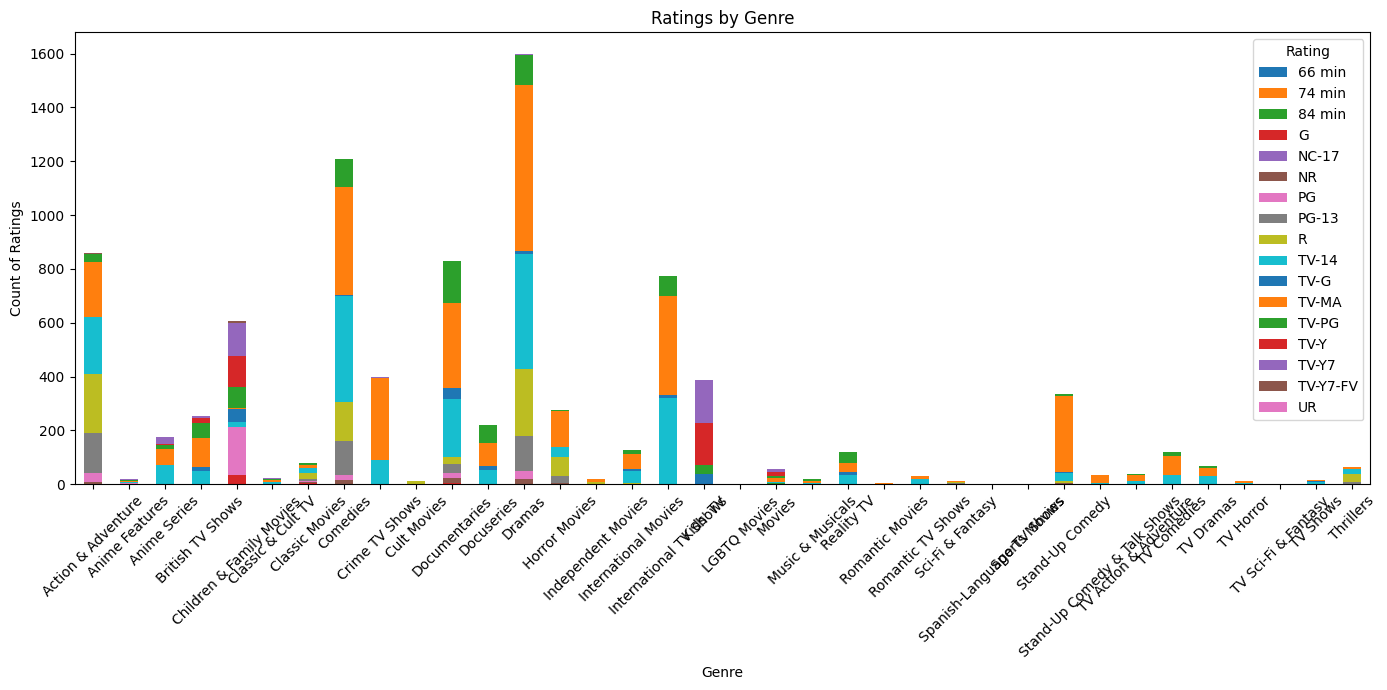

In [21]:
# Count the number of ratings by genre
ratings_by_genre = df.groupby('genre')['rating'].value_counts().unstack().fillna(0)

# Plotting the ratings by genre
plt.figure(figsize=(14, 7))
ratings_by_genre.plot(kind='bar', stacked=True, figsize=(14, 7))

plt.title('Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Count of Ratings')
plt.xticks(rotation=45)
plt.legend(title='Rating')
plt.tight_layout()
plt.show()


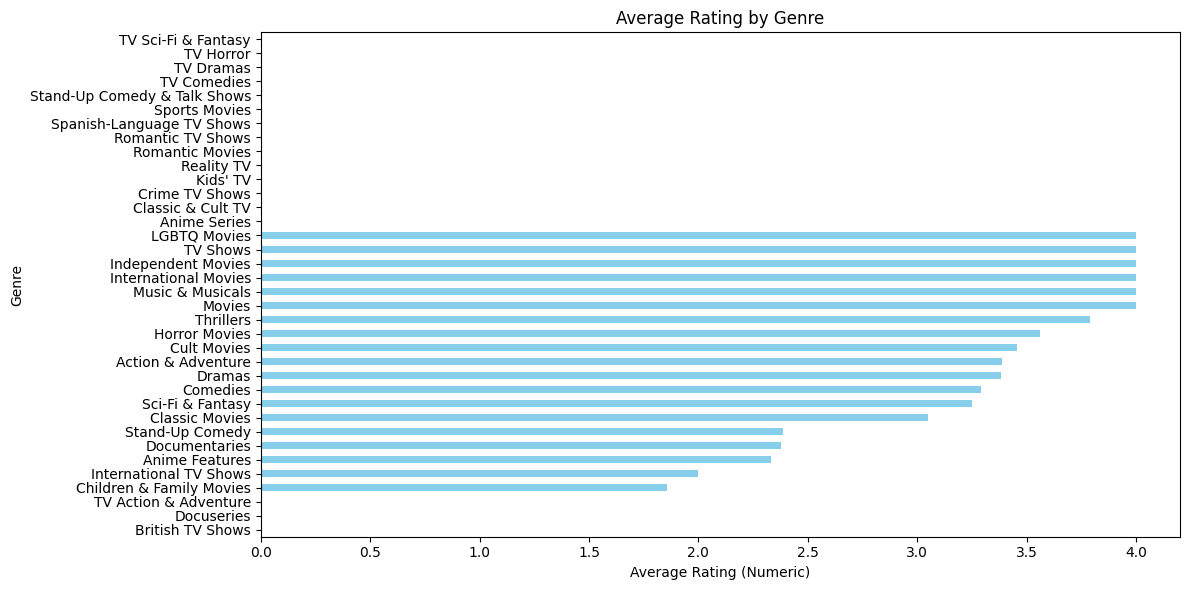

In [23]:
# Create a DataFrame with ratings converted to numeric values
df['rating_numeric'] = df['rating'].map({
    'G': 1, 'PG': 2, 'PG-13': 3, 'R': 4, 'NR': 0, 'Not Rated': 0
})

# Calculate average rating by genre
average_rating_by_genre = df.groupby('genre')['rating_numeric'].mean()

# Plotting average rating by genre
plt.figure(figsize=(12, 6))
average_rating_by_genre.sort_values().plot(kind='barh', color='skyblue')

plt.title('Average Rating by Genre')
plt.xlabel('Average Rating (Numeric)')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


<Figure size 1400x700 with 0 Axes>

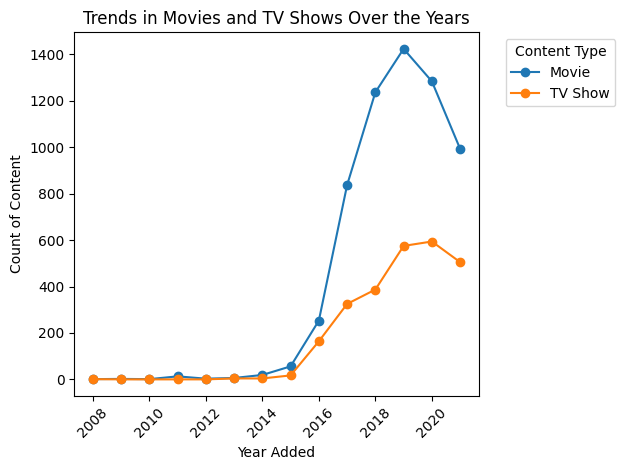

In [24]:
# Count of content types per year
content_type_trend = df.groupby(['year_added', 'type']).size().unstack(fill_value=0)

# Plotting the trend of movies and TV shows over the years
plt.figure(figsize=(14, 7))
content_type_trend.plot(kind='line', marker='o')

plt.title('Trends in Movies and TV Shows Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Count of Content')
plt.xticks(rotation=45)
plt.legend(title='Content Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [32]:
# Check the data types of the columns
print(df.dtypes)


show_id                   object
type                      object
title                     object
director                  object
cast                      object
country                   object
date_added        datetime64[ns]
release_year               int64
rating                    object
duration                  object
listed_in                 object
description               object
year_added               float64
genre                     object
rating_numeric           float64
dtype: object


In [33]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Display the numeric columns
print(numeric_df.columns)


Index(['release_year', 'year_added', 'rating_numeric'], dtype='object')


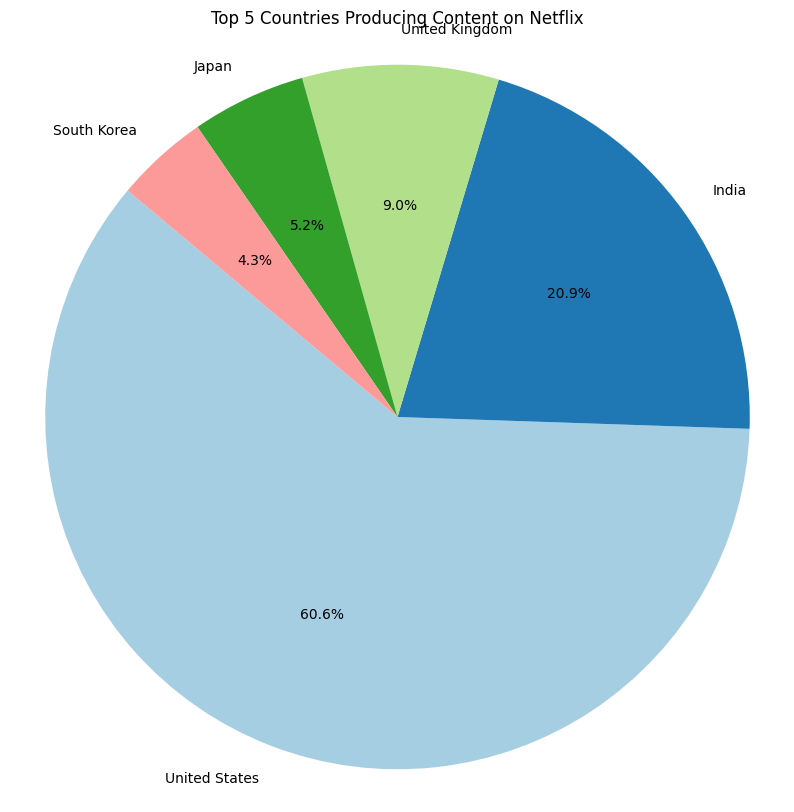

In [37]:
# Get the top 5 countries producing content
top_countries = df['country'].value_counts().nlargest(5)

# Create a pie chart for the top countries
plt.figure(figsize=(10, 10))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 5 Countries Producing Content on Netflix')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


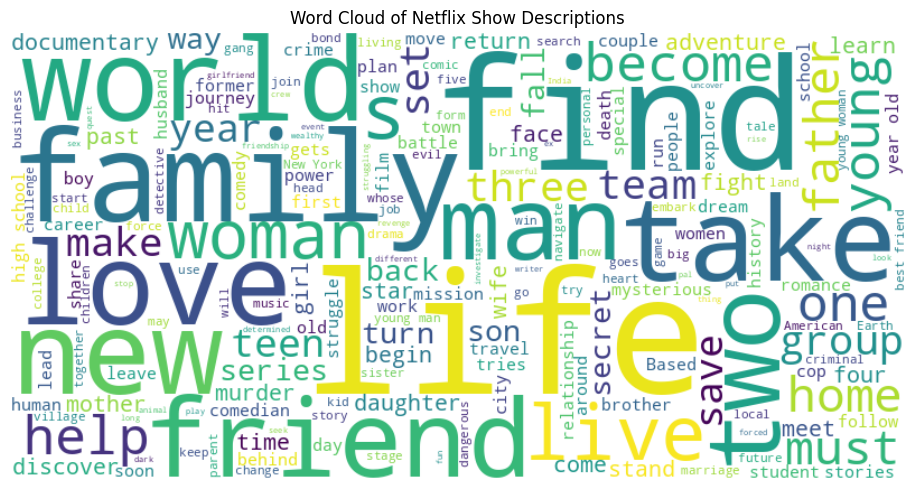

In [39]:
from wordcloud import WordCloud

# Combine all descriptions into a single string
text = " ".join(description for description in df['description'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Do not show axes
plt.title('Word Cloud of Netflix Show Descriptions')
plt.tight_layout()
plt.show()
